In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data paths
HT348 = '/home/luviola/buckets/b1/exp/HT3480/HT348.txt'
HT348M = '/home/luviola/buckets/b1/exp/HT3480/HT348_mejor.txt'

In [8]:
# Load HT348
df = pd.read_csv(HT348, sep='\t', parse_dates=['fecha'])
df.head()

,fecha,cp,minsplit,minbucket,maxdepth,xval_folds,ganancia,iteracion
0,2024-09-16 22:36:07,-0.188809,5143,2098,11,5,46701000,1
1,2024-09-16 22:36:38,-0.678386,6550,437,12,5,47637000,2
2,2024-09-16 22:37:04,-0.491178,7323,2467,13,5,46260000,3
3,2024-09-16 22:37:34,-0.937438,3958,717,14,5,47208000,4
4,2024-09-16 22:37:57,-0.016662,5636,900,6,5,48297000,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       116 non-null    datetime64[ns]
 1   cp          116 non-null    float64       
 2   minsplit    116 non-null    int64         
 3   minbucket   116 non-null    int64         
 4   maxdepth    116 non-null    int64         
 5   xval_folds  116 non-null    int64         
 6   ganancia    116 non-null    int64         
 7   iteracion   116 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 7.4 KB


In [10]:
df.describe()

,fecha,cp,minsplit,minbucket,maxdepth,xval_folds,ganancia,iteracion
count,116,116.000000,116.000000,116.000000,116.000000,116.0,1.160000e+02,116.000000
mean,2024-09-16 23:02:20.310344448,-0.493024,4488.465517,1218.146552,10.948276,5.0,4.586384e+07,58.500000
min,2024-09-16 22:36:07,-0.999949,2.000000,1.000000,3.000000,5.0,0.000000e+00,1.000000
25%,2024-09-16 22:48:52.750000128,-0.757423,2422.750000,104.500000,5.000000,5.0,4.652100e+07,29.750000
50%,2024-09-16 23:02:32.500000,-0.515692,4501.500000,769.500000,10.000000,5.0,4.683150e+07,58.500000
75%,2024-09-16 23:15:46.500000,-0.209528,6602.000000,2093.500000,18.000000,5.0,4.748775e+07,87.250000
max,2024-09-16 23:28:54,0.099945,8000.000000,3998.000000,20.000000,5.0,5.054700e+07,116.000000
std,NaN,0.306348,2503.011443,1244.638710,6.489918,0.0,6.865520e+06,33.630343


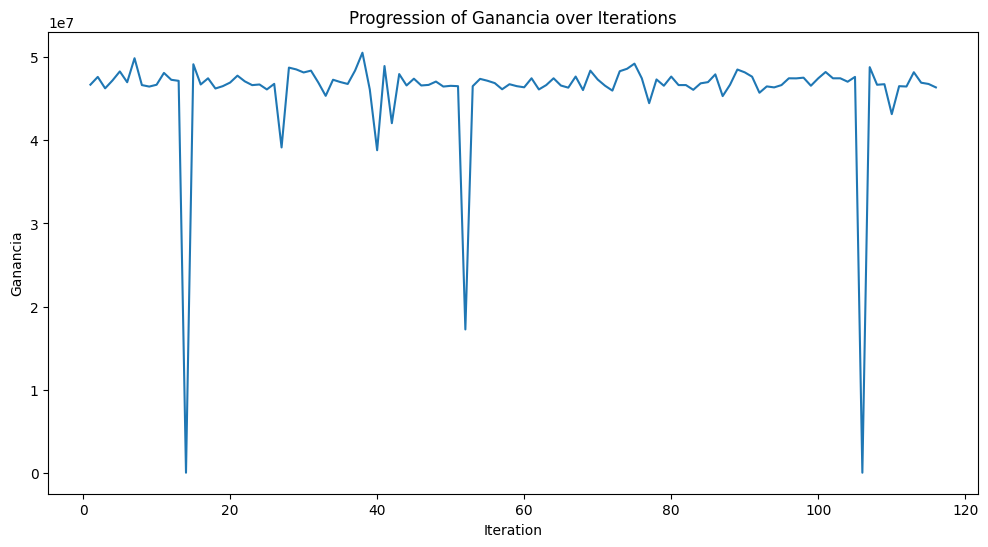

In [14]:
# Plot progression of ganancia over iterations
plt.figure(figsize=(12, 6))
plt.plot(df['iteracion'], df['ganancia'])
plt.title('Progression of Ganancia over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

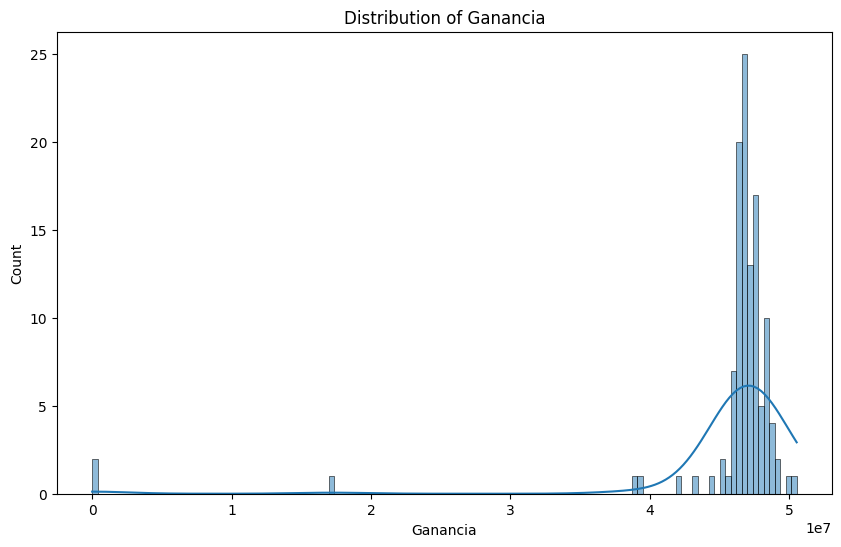

In [15]:
# Plot distribution of ganancia
plt.figure(figsize=(10, 6))
sns.histplot(df['ganancia'], kde=True)
plt.title('Distribution of Ganancia')
plt.xlabel('Ganancia')
plt.show()

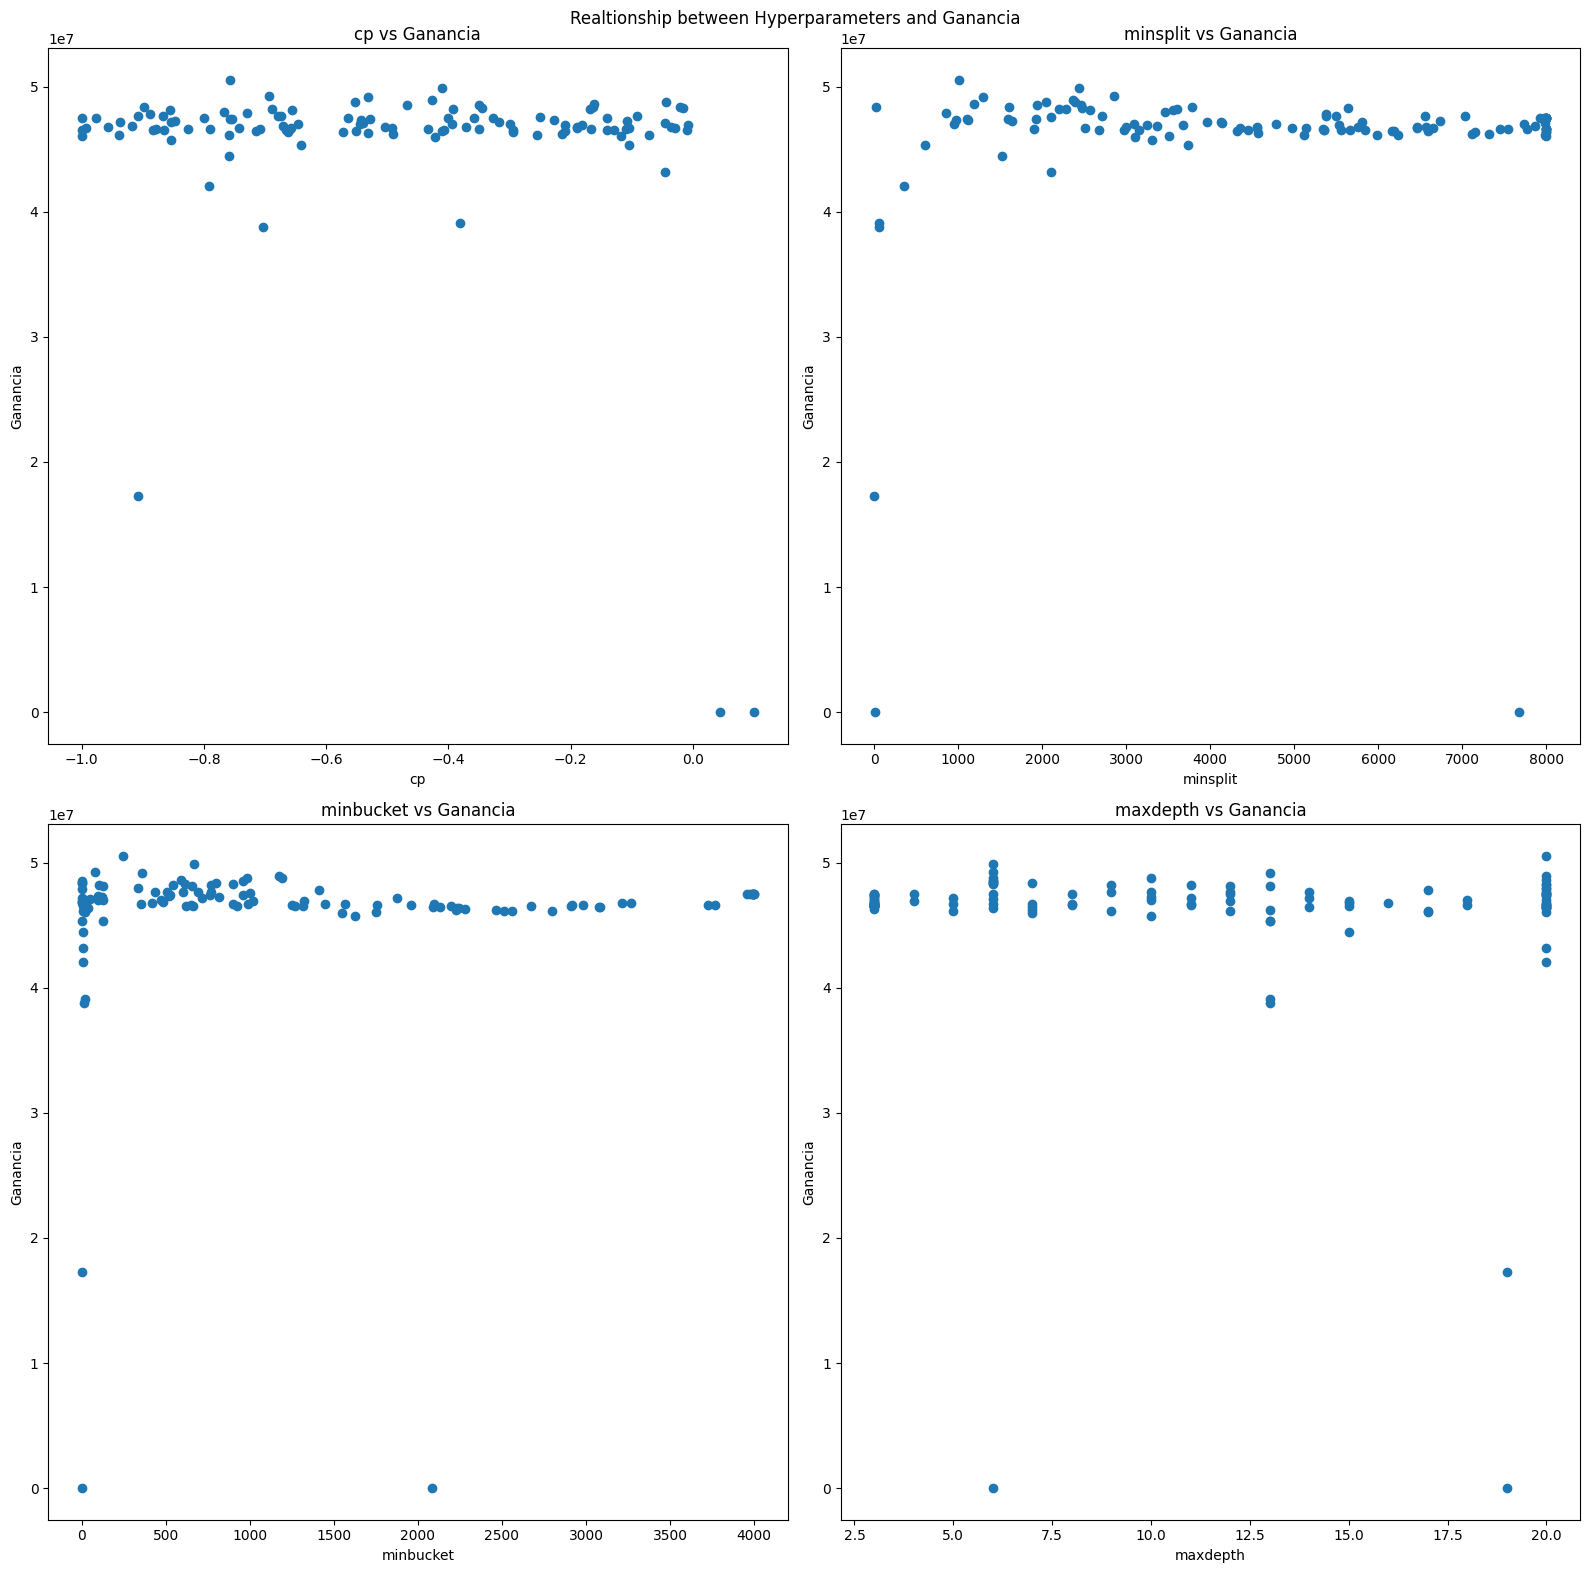

In [17]:
# Analyze relationship between hyperparemeters and ganancia
hyperparameters = ['cp', 'minsplit', 'minbucket', 'maxdepth']

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Realtionship between Hyperparameters and Ganancia')

for i, param in enumerate(hyperparameters):
    ax = axes[i // 2, i % 2]
    ax.scatter(df[param], df['ganancia'])
    ax.set_xlabel(param)
    ax.set_ylabel('Ganancia')
    ax.set_title(f'{param} vs Ganancia')

plt.tight_layout()
plt.show()

In [18]:
# Load HT348M
dfm = pd.read_csv(HT348M, sep='\t', parse_dates=['fecha'])
dfm.head()

,fecha,cp,minsplit,minbucket,maxdepth,xval_folds,ganancia,iteracion
0,2024-09-16 22:36:03,-0.188809,5143,2098,11,5,46701000,1
1,2024-09-16 22:36:36,-0.678386,6550,437,12,5,47637000,2
2,2024-09-16 22:37:54,-0.016662,5636,900,6,5,48297000,5
3,2024-09-16 22:38:53,-0.410486,2433,669,6,5,49884000,7
4,2024-09-16 22:52:53,-0.758107,1009,249,20,5,50547000,38


In [19]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       5 non-null      datetime64[ns]
 1   cp          5 non-null      float64       
 2   minsplit    5 non-null      int64         
 3   minbucket   5 non-null      int64         
 4   maxdepth    5 non-null      int64         
 5   xval_folds  5 non-null      int64         
 6   ganancia    5 non-null      int64         
 7   iteracion   5 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 452.0 bytes


In [20]:
dfm.describe()

,fecha,cp,minsplit,minbucket,maxdepth,xval_folds,ganancia,iteracion
count,5,5.000000,5.000000,5.000000,5.000000,5.0,5.000000e+00,5.000000
mean,2024-09-16 22:40:27.799999744,-0.410490,4154.200000,870.600000,11.000000,5.0,4.861320e+07,10.600000
min,2024-09-16 22:36:03,-0.758107,1009.000000,249.000000,6.000000,5.0,4.670100e+07,1.000000
25%,2024-09-16 22:36:36,-0.678386,2433.000000,437.000000,6.000000,5.0,4.763700e+07,2.000000
50%,2024-09-16 22:37:54,-0.410486,5143.000000,669.000000,11.000000,5.0,4.829700e+07,5.000000
75%,2024-09-16 22:38:53,-0.188809,5636.000000,900.000000,12.000000,5.0,4.988400e+07,7.000000
max,2024-09-16 22:52:53,-0.016662,6550.000000,2098.000000,20.000000,5.0,5.054700e+07,38.000000
std,NaN,0.314979,2332.816259,728.425219,5.744563,0.0,1.586188e+06,15.501613


In [21]:
dfm

,fecha,cp,minsplit,minbucket,maxdepth,xval_folds,ganancia,iteracion
0,2024-09-16 22:36:03,-0.188809,5143,2098,11,5,46701000,1
1,2024-09-16 22:36:36,-0.678386,6550,437,12,5,47637000,2
2,2024-09-16 22:37:54,-0.016662,5636,900,6,5,48297000,5
3,2024-09-16 22:38:53,-0.410486,2433,669,6,5,49884000,7
4,2024-09-16 22:52:53,-0.758107,1009,249,20,5,50547000,38


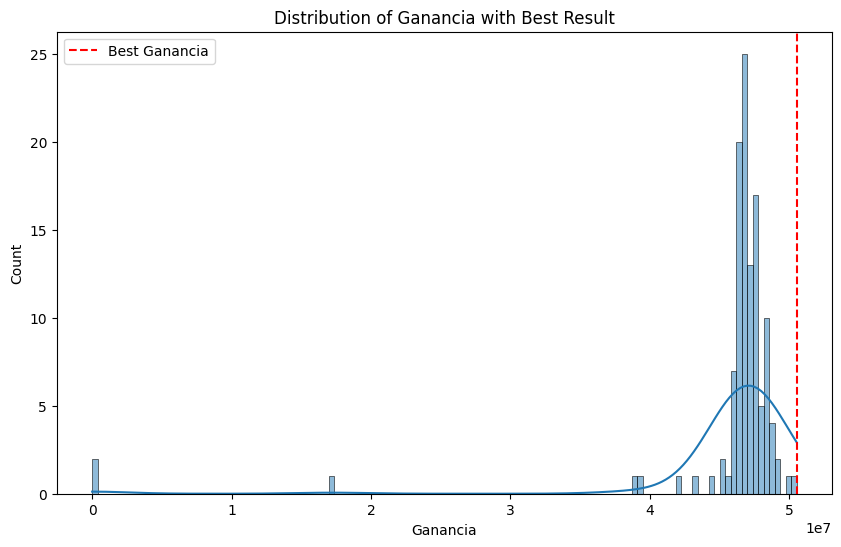

In [22]:
# Compare the best result with the overall distribution
best_ganancia = dfm['ganancia'].max()
plt.figure(figsize=(10, 6))
sns.histplot(df['ganancia'], kde=True)
plt.axvline(best_ganancia, color='r', linestyle='--', label='Best Ganancia')
plt.title('Distribution of Ganancia with Best Result')
plt.xlabel('Ganancia')
plt.legend()
plt.show()

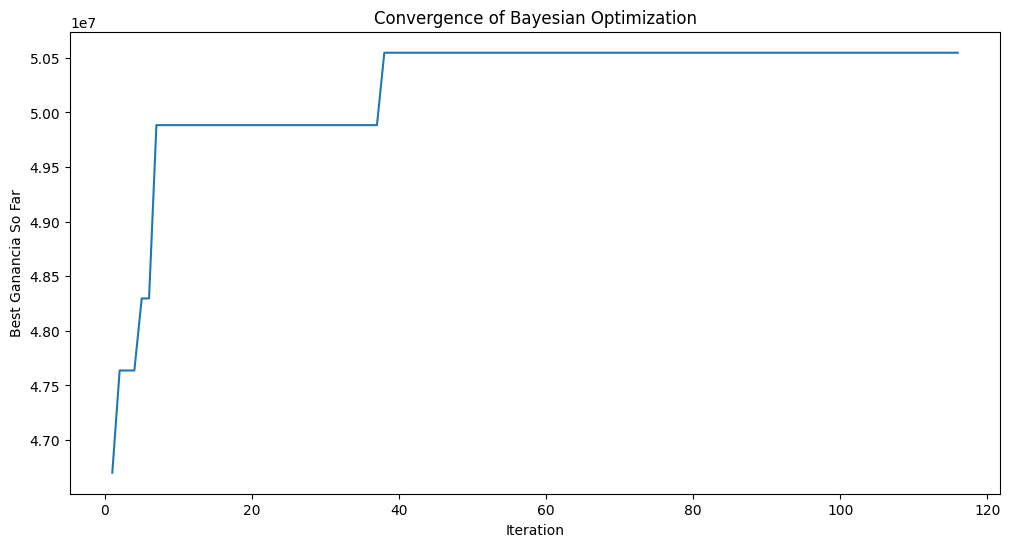

In [23]:
# Analyze the convergence of the optimization
df['best_so_far'] = df['ganancia'].cummax()
plt.figure(figsize=(12, 6))
plt.plot(df['iteracion'], df['best_so_far'])
plt.title('Convergence of Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Best Ganancia So Far')
plt.show()

In [25]:
# Calculate and print some statistics
total_time = (df['fecha'].max() - df['fecha'].min()).total_seconds() / 60
print(f"Total time of the experiment: {total_time:.2f} minutes")
print(f"Number of iterations: {df['iteracion'].max()}")
print(f"Best ganancia: {best_ganancia}")
print(f"Iteration where best ganancia was found: {dfm['iteracion'].iloc[-1]}")

Total time of the experiment: 52.78 minutes
Number of iterations: 116
Best ganancia: 50547000
Iteration where best ganancia was found: 38


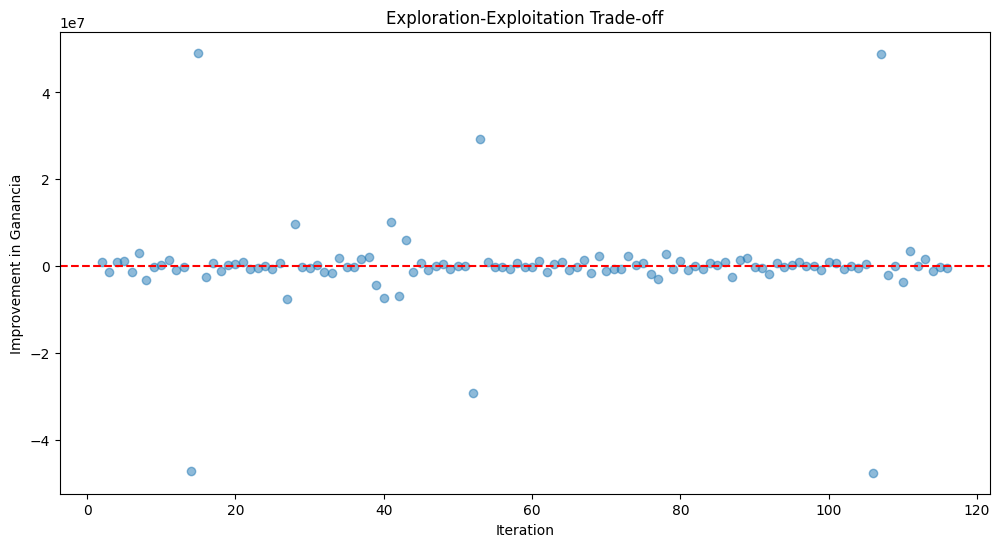

In [26]:
# Analyze the exploration-exploitation trade-off
df['improvement'] = df['ganancia'] - df['ganancia'].shift(1)
plt.figure(figsize=(12, 6))
plt.scatter(df['iteracion'], df['improvement'], alpha=0.5)
plt.title('Exploration-Exploitation Trade-off')
plt.xlabel('Iteration')
plt.ylabel('Improvement in Ganancia')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [28]:
# Print the hyperparameters of the best result
best_params = dfm.iloc[-1][hyperparameters]
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best hyperparameters:
cp: -0.758106777551853
minsplit: 1009
minbucket: 249
maxdepth: 20
